# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 2381 Ахметгареев Карим Ильгизович и Самулевич Степан Александрович. Вариант №1.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения
Входной сигнал:
$$x[n] = e^{\omega j n}$$
Метод прямоугольников:
$$y[n] = y[n-1] + x[n]$$
Метод трапеций:
$$y[n] = y[n-1] + \frac{1}{2} (x[n-1] + x[n])$$
Метод Симпсона:
$$y[n] = y[n-2] + \frac{1}{3}(x[n-2] + 4x[n-1] + x[n])$$
Метод $\frac{3}{8}$:
$$y[n] = y[n-3] + \frac{\textbf{3}}{8}(x[n-3] + 3x[n-2] + 3x[n-1]+x[n])$$


## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы



Пусть входной сигнал имеет вид $x[n] = e^{\omega j n}$.

Вычислим истинное значение интеграла:
$$y(t) = \int_{-\infty}^t x(u)du = \frac{e^{\omega j t }}{\omega j}$$
Откуда имеем $H(\omega) = \frac{1}{\omega j}$

Рассмотрим методы численного интегрирования:
* Метод прямоугольников:
$$y[n] = y[n-1] + x[n]$$
Получим формулу для передаточной функции фильтра:
$$Y(\omega) = Y(\omega)e^{- \omega j}+X(\omega) \Rightarrow \frac{Y(\omega)}{X(\omega)} =  H(\omega) = \frac{1}{1-e^{-\omega j}}$$
Отношение к истинному интегралу:
$$R(\omega) = \frac{1}{\omega j(1-e^{-\omega j})}$$
* Метод трапеций:
$$y[n] = y[n-1] + \frac{1}{2} (x[n-1] + x[n])$$
Получим формулу для передаточной функции фильтра:
$$Y(\omega) = Y(\omega)e^{- \omega j} + \frac{1}{2}(X(\omega)e^{-\omega j} + X(\omega))$$
Тогда:
$$\frac{Y(\omega)}{X(\omega)} = H(\omega) = \frac{1+e^{-\omega j}}{2(1-e^{-\omega j})}$$
Отношение к истинному интегралу:
$$R(\omega) = \frac{1+e^{-\omega j}}{2\omega j(1-e^{-\omega j})}$$
* Метод Симпсона:
$$y[n] = y[n-2] + \frac{1}{3}(x[n-2] + 4x[n-1] + x[n])$$
Получим формулу для передаточной функции фильтра:
$$Y(\omega) = Y(\omega)e^{- 2\omega j} + \frac{1}{3}(X(\omega)e^{-2\omega j} + 4X(\omega)e^{-\omega j} + X(\omega))$$
Тогда:
$$\frac{Y(\omega)}{X(\omega)} = H(\omega) = \frac{1+4e^{-j\omega} + e^{-2\omega j}}{3(1-e^{-2j\omega})}$$
Отношение к истинному интегралу:
$$R(\omega) = \frac{h(1+4e^{-j\omega} + e^{-2\omega j})}{3\omega j(1-e^{-2j\omega})}$$

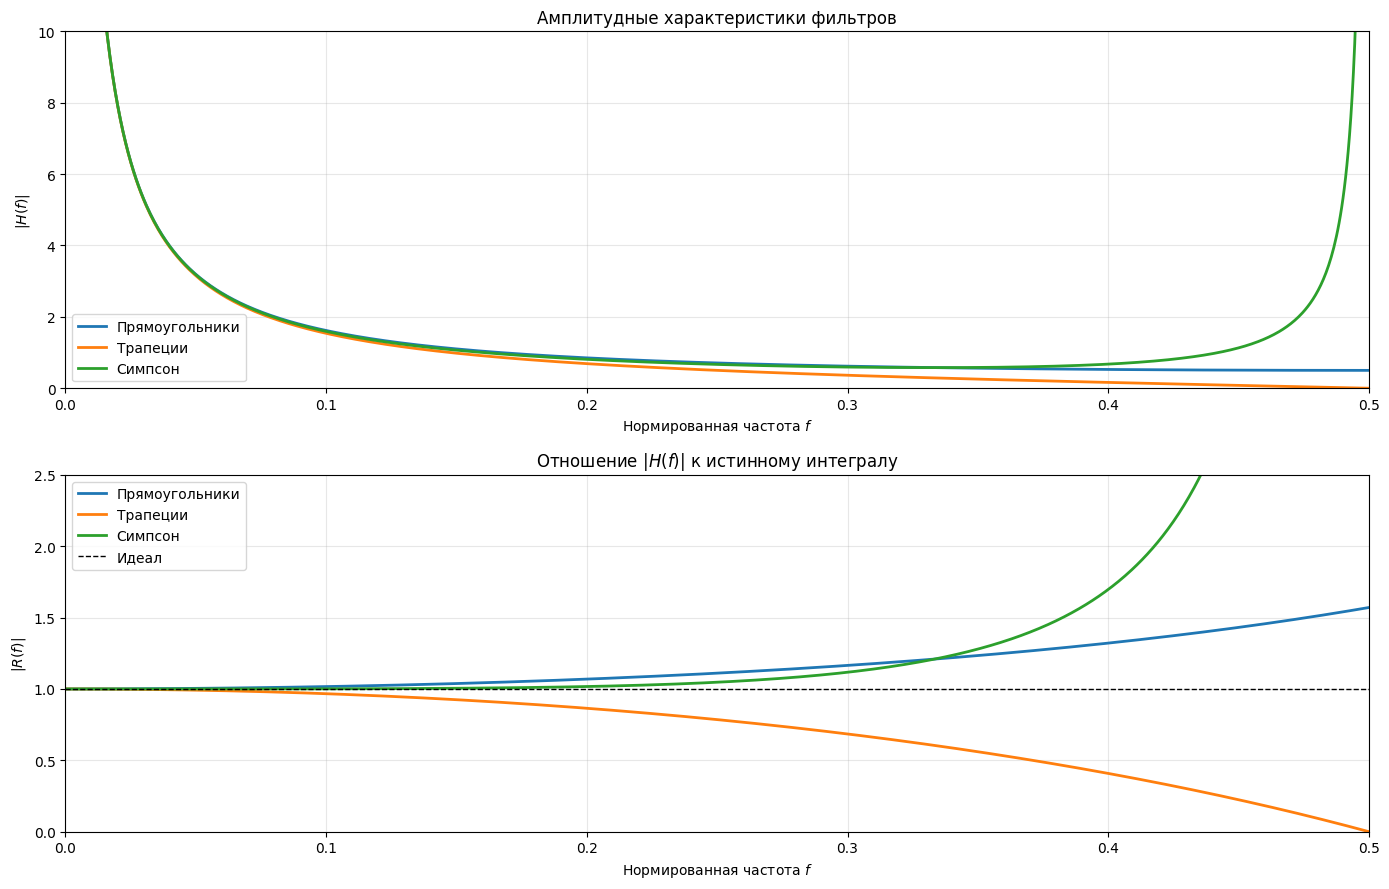

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = np.linspace(0.0001, 0.5, 1000)
w = 2 * np.pi * f

H_rect = 1 / (1 - np.exp(-1j * w))
A_rect = np.abs(H_rect)

H_trap = (1 / 2) * (1 + np.exp(-1j * w)) / (1 - np.exp(-1j * w))
A_trap = np.abs(H_trap)

num = np.exp(2j * w) + 4 * np.exp(1j * w) + 1
den = 1 - np.exp(2j * w)
H_simp = (1 / 3) * num / den
A_simp = np.abs(H_simp)

true_gain = 1 / (2 * np.pi * f)

ratio_rect = A_rect / true_gain
ratio_trap = A_trap / true_gain
ratio_simp = A_simp / true_gain

plt.figure(figsize=(14, 9))

plt.subplot(2, 1, 1)
plt.plot(f, A_rect, label='Прямоугольники', linewidth=2)
plt.plot(f, A_trap, label='Трапеции', linewidth=2)
plt.plot(f, A_simp, label='Симпсон', linewidth=2)
plt.title('Амплитудные характеристики фильтров')
plt.xlabel('Нормированная частота $f$')
plt.ylabel('$|H(f)|$')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(0, 10)
plt.xlim(0, 0.5)

plt.subplot(2, 1, 2)
plt.plot(f, ratio_rect, label='Прямоугольники', linewidth=2)
plt.plot(f, ratio_trap, label='Трапеции', linewidth=2)
plt.plot(f, ratio_simp, label='Симпсон', linewidth=2)
plt.axhline(1, color='k', linestyle='--', linewidth=1, label='Идеал')
plt.title('Отношение $|H(f)|$ к истинному интегралу')
plt.xlabel('Нормированная частота $f$')
plt.ylabel('$|R(f)|$')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(0, 2.5)
plt.xlim(0, 0.5)

plt.tight_layout()
plt.show()

Анализ показал, что все рассматриваемые методы аппроксимируют идеальный интегратор в области низких частот, где амплитудная характеристика $|H(f)|$ близка к зависимости $\frac{1}{\omega}$, а фазовая — к сдвигу на $-\frac{\pi}{2}$. При увеличении частоты точность интегрирования снижается, что связано с особенностями полиномиальных аппроксимаций и дискретным характером численных схем.

Метод прямоугольников демонстрирует наибольшие искажения, быстрое снижение амплитуды и узкую область, в которой $|R(f)|\approx 1$. Формула трапеций обеспечивает более плавное поведение и расширенную рабочую полосу частот, снижая фазовые ошибки. Формула Симпсона даёт более точное соответствие идеальному интегратору в широкой области низких частот, однако на высоких частотах появляются колебания амплитуды и провалы. Формула $\frac{3}{8}$ демонстрирует аналогичное поведение, обладая при этом несколько большей точностью в низкочастотной области.

Рассмотрим метод $\frac{3}{8}$ (в условии ошибка):
$$y[n] = y[n-3] + \frac{\textbf{3}}{8}(x[n-3] + 3x[n-2] + 3x[n-1]+x[n])$$
Получим формулу для передаточной функции фильтра:
$$Y(\omega) = Y(\omega)e^{- 3\omega j} + \frac{3}{8}(X(\omega)e^{-3\omega j} + 3X(\omega)e^{-2\omega j} + 3X(\omega)e^{-\omega j} + X(\omega))$$
Тогда:
$$\frac{Y(\omega)}{X(\omega)} = H(\omega) = \frac{3(1+3e^{-\omega j}+3e^{-2\omega j}+e^{-3\omega j})}{8(1-e^{-3\omega j})}$$
Отношение к истинному интегралу:
$$R(\omega) = \frac{3(1+3e^{-\omega j}+3e^{-2\omega j}+e^{-3\omega j})}{8\omega j(1-e^{-3\omega j})}$$


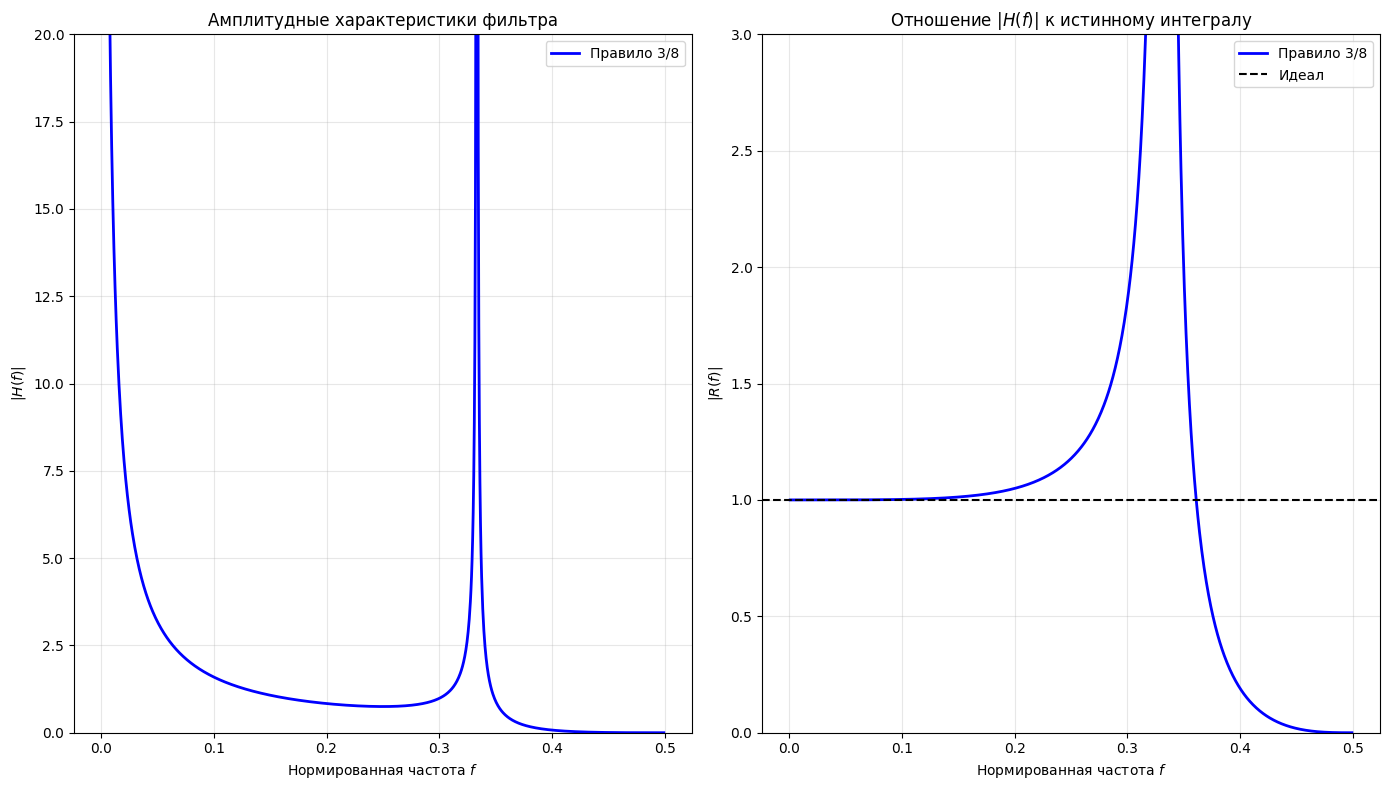

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = np.linspace(0.001, 0.499, 1000)
w = 2 * np.pi * f

num = 1 + 3*np.exp(-1j*w) + 3*np.exp(-2j*w) + np.exp(-3j*w)
den = 1 - np.exp(-3j*w)
H_38 = (3*h/8) * num / den
A_38 = np.abs(H_38)

true_gain = 1 / (2 * np.pi * f)
ratio_38 = A_38 / true_gain

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.plot(f, A_38, 'blue', lw=2, label='Правило 3/8')
plt.ylim(0, 20)
plt.title('Амплитудные характеристики фильтра')
plt.xlabel('Нормированная частота $f$')
plt.ylabel('$|H(f)|$')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(f, ratio_38, 'blue', lw=2, label='Правило 3/8')
plt.axhline(1, color='k', linestyle='--', label='Идеал')
plt.ylim(0, 3)
plt.title('Отношение $|H(f)|$ к истинному интегралу')
plt.xlabel('Нормированная частота $f$')
plt.ylabel('$|R(f)|$')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

По характеру зависимости $|H(f)|$ близко к правилу Симпсона, но диапазон частот, в котором сохраняется соответствие идеальному интегратору, несколько шире. При больших частотах также проявляются нули и провалы амплитуды, обусловленные полиномиальной структурой числителя. Отношение $|R(f)|$ показывает наилучшее соответствие единице среди рассмотренных формул при малых частотах. Метод отличается высокой точностью аппроксимации, но сложной частотной зависимостью на высоких частотах.

**Сопоставительный анализ**

Все рассмотренные квадратурные формулы аппроксимируют идеальный интегратор на низких частотах. Точность возрастает с повышением порядка формулы. Наиболее грубые результаты даёт правило прямоугольников, лучшее согласование с идеальным интегратором обеспечивают формулы Симпсона и $\frac{3}{8}$. Правило трапеций занимает промежуточное положение, обеспечивая плавное поведение амплитуды и малые фазовые искажения.
Высокопорядковые формулы (Симпсона, $\frac{3}{8}$) обеспечивают лучшую точность при малых частотах, но на высоких частотах проявляют провалы и колебания из-за нулей в числителе передаточной функции.
Таким образом, для интегрирования низкочастотных сигналов предпочтительны методы Симпсона и $\frac{3}{8}$, для сигналов с более широким спектром — правило трапеций, а правило прямоугольников целесообразно использовать только при грубой оценке интеграла.

### Выводы  
В ходе работы были исследованы частотные характеристики передаточных функций численных интеграторов, построенных на основе квадратурных формул прямоугольников, трапеций, Симпсона и $\frac{3}{8}$. Получены выражения для передаточных функций и построены их амплитудно-частотные зависимости.

Проведён анализ показал, что все рассмотренные формулы аппроксимируют идеальный интегратор на низких частотах, однако степень точности различается. Наиболее значительные погрешности наблюдаются у правила прямоугольников, более высокая точность достигается при использовании формулы трапеций. Наилучшее совпадение с идеальной частотной характеристикой обеспечивают методы Симпсона и $\frac{3}{8}$, особенно в области низких частот.

При возрастании частоты точность всех формул уменьшается, при этом у формул более высокого порядка наблюдаются колебания и провалы в спектре, обусловленные наличием нулей в числителе передаточной функции.

Таким образом, методы Симпсона и $\frac{3}{8}$ целесообразно применять для интегрирования сигналов с преобладанием низкочастотных компонент, а правило трапеций может быть рекомендовано для сигналов с более широким спектром.
